# Анализ интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры.

# Получение данных из файла

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import sklearn

In [3]:
data = pd.read_csv('games.csv')

# Обзор данных

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.duplicated().sum()

0

In [7]:
# проверим кол-во пропусков
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Вывод:**
В результате "Обзора данных", мы видим, что всего в датасете 11 столбцов и 16715 строк, есть пропуски в некоторых столбцах, дубликаты отсутствуют

# Предобработка данных

* Дубликатов в датасете нет
* Имеются пропуски в некотрых столбцах, необходимо обработать пропуски и изменить тип данных
* Изменить названия столбцов(привести к нижнему регистру)
* Посчитать суммц продаж во всех регионах и записать их в отдельный столбец

In [8]:
data.columns = data.columns.str.lower()  
data.head()  

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
data[data['name'].isnull()] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Данные пропуски лучше удалить, их всего два и тем более без названия игры мы ничего не сделаем

In [10]:
data = data.dropna(subset = ['name'])


In [11]:
data[data['year_of_release'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Всего пропусков 269 из 16446 - это 1,63 %, на результат не повлияет, поэтому эти пропуски можно также удалить

In [12]:
data = data.dropna(subset = ['year_of_release'])

data['year_of_release'] = data['year_of_release'].astype('int')

In [13]:
data[data['rating'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


В большинстве с рейтингом пропущены и значения столбцов с оценкой критиков и оценкой пользователей, удалять такие столбцы нельзя

In [14]:
data['rating'] = data['rating'].fillna('Unknown')
data['rating'].value_counts()

rating
Unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: count, dtype: int64

Черыре видов рейтинга встречаются часто: E, T, M, E10+, и четыре редко.

Заменим:
* EC на E
* K-A на T
* AO на Unknown
* RP на E10+

In [14]:
data.loc[data['rating'] == 'EC', 'rating'] = 'E'
data.loc[data['rating'] == 'K-A', 'rating'] = 'T'
data.loc[data['rating'] == 'AO', 'rating'] = 'Unknown'
data.loc[data['rating'] == 'RP', 'rating'] = 'Unknown'

In [15]:
data['rating'].value_counts()

rating
Unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: count, dtype: int64

In [16]:
data[data['critic_score'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknown
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknown
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,Unknown


Пропусков очень много, удалять их нельзя.

In [17]:
 data['critic_score'] = data['critic_score'].fillna(-10)
 
data['critic_score'] = data['critic_score'].astype('int')
data['critic_score'].unique()

array([ 76, -10,  82,  80,  89,  58,  87,  91,  61,  97,  95,  77,  88,
        83,  94,  93,  85,  86,  98,  96,  90,  84,  73,  74,  78,  92,
        71,  72,  68,  62,  49,  67,  81,  66,  56,  79,  70,  59,  64,
        75,  60,  63,  69,  50,  25,  42,  44,  55,  48,  57,  29,  47,
        65,  54,  20,  53,  37,  38,  33,  52,  30,  32,  43,  45,  51,
        40,  46,  39,  34,  41,  36,  31,  27,  35,  26,  19,  28,  23,
        24,  21,  17,  13])

In [18]:
data[data['user_score'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-10,NaN,Unknown
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-10,NaN,Unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-10,NaN,Unknown
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-10,NaN,Unknown
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-10,NaN,Unknown


Пропусков очень много, удалять их нельзя. Также посмотрим на аббревиатуру "tbd"

In [19]:
data[data['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,-10,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,-10,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,-10,tbd,E


In [20]:
len(data[data['user_score'] == 'tbd']) / len(data)

0.14449039163220628

Аббревиатура 'tbd' ничем не отличается от пропусков. Но к тому же их 14,4%, удалять нельзя. Заменим их значением заглушкой.

In [21]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
 
data['user_score'] = data['user_score'].replace(np.NaN, -10)
 
data['user_score'] = data['user_score'].astype('float')
data['user_score'].unique()

array([  8. , -10. ,   8.3,   8.5,   6.6,   8.4,   8.6,   7.7,   6.3,
         7.4,   8.2,   9. ,   7.9,   8.1,   8.7,   7.1,   3.4,   5.3,
         4.8,   3.2,   8.9,   6.4,   7.8,   7.5,   2.6,   7.2,   9.2,
         7. ,   7.3,   4.3,   7.6,   5.7,   5. ,   9.1,   6.5,   8.8,
         6.9,   9.4,   6.8,   6.1,   6.7,   5.4,   4. ,   4.9,   4.5,
         9.3,   6.2,   4.2,   6. ,   3.7,   4.1,   5.8,   5.6,   5.5,
         4.4,   4.6,   5.9,   3.9,   3.1,   2.9,   5.2,   3.3,   4.7,
         5.1,   3.5,   2.5,   1.9,   3. ,   2.7,   2.2,   2. ,   9.5,
         2.1,   3.6,   2.8,   1.8,   3.8,   0. ,   1.6,   9.6,   2.4,
         1.7,   1.1,   0.3,   1.5,   0.7,   1.2,   2.3,   0.5,   1.3,
         0.2,   0.6,   1.4,   0.9,   1. ,   9.7])

In [22]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

In [23]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-10,-10.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-10,-10.0,Unknown,31.38


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int32  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.5+ MB


**Вывод:** Данные в датасете преобразованы для дальнейшего использования, были обработаны пропуски, в некоторых случаях строки были удалены за ненадобностью, в некоторых пропуски были заменены на значение заглушку (-10), также были расчитаны суммарные продажи по регионам и записаны в отдельный столбец 'total_sales'

# Исследовательский анализ

**Сколько игр выпускалось в разные годы:**
* Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Text(0, 0.5, 'Общии продажи')

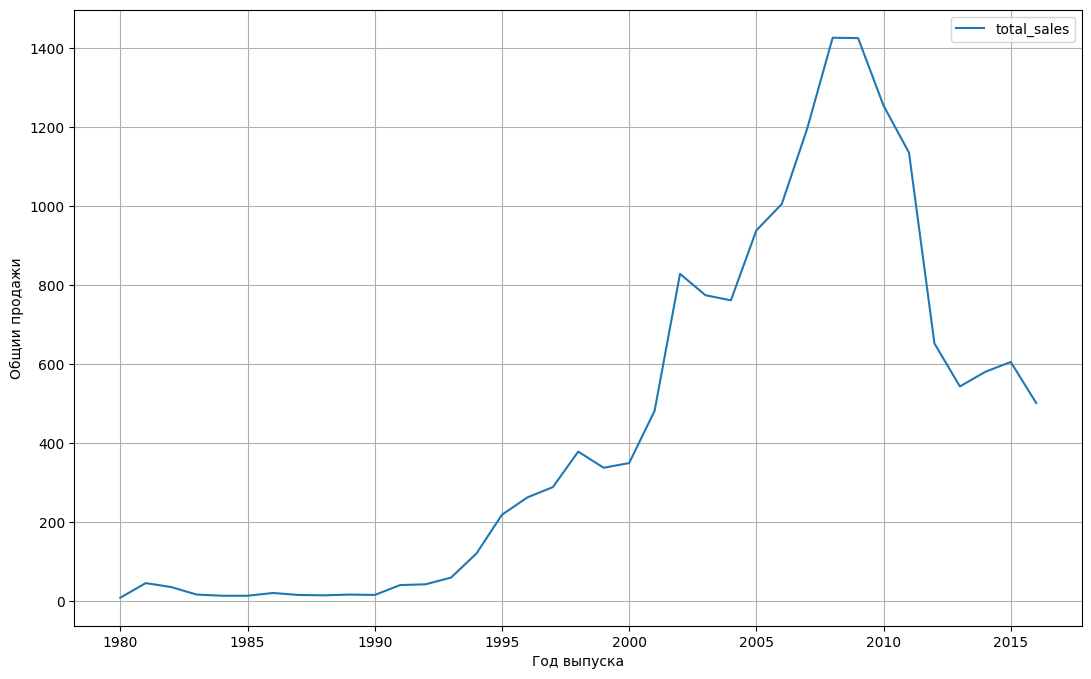

In [25]:
platform_sales = data.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'count').plot(grid = True, figsize = (13,8))
platform_sales.set_xlabel('Год выпуска')
platform_sales.set_ylabel('Общии продажи')


**Вывод:** Из графика можно предположить, что начиная с 2000 года начался рост количества игр, с 2002 по 2004 выявлен небольшой "застой", а затем резкий скачок до 2008-2009г, где наблюдался пик количества игр, затем наступил спад количества вплоть до 2016г. Таким образом, актуальными являются данные за прошедшие 10 лет, которые отражают как взлет, так и падение количества игр.

**Как менялись продажи по платформам:**
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

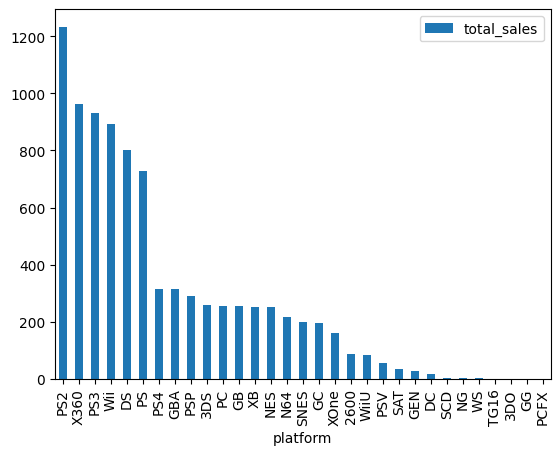

In [26]:
platform_sales = data.pivot_table(index = 'platform', 
                                  values = 'total_sales', 
                                  aggfunc = 'sum').sort_values('total_sales', ascending=False).plot(kind = 'bar')

**Вывод:** Из данного графика можно выделить несколько платформ с наибольшими суммарными продажами, например, PS2, X360, PS3, Wii, DS, PS. Данные 6 платформ выделяются от всех остальных наибольшими суммарными продажами.

***Посмотрим, как менялись продажи по платформам с максимальным количеством продаж, построим распределение по годам:***

<Axes: xlabel='year_of_release'>

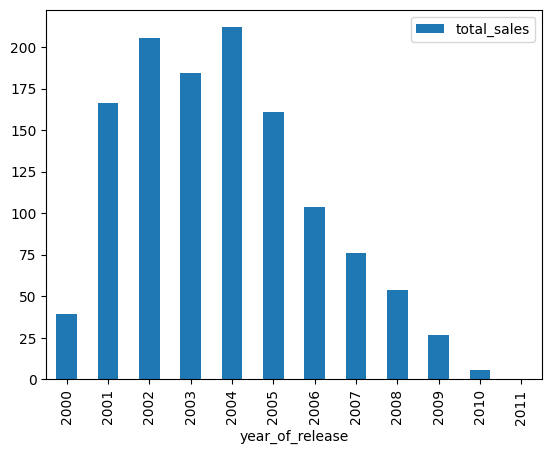

In [27]:
data.query('platform == "PS2"').pivot_table(index='year_of_release', 
                                            values='total_sales', 
                                            aggfunc='sum').plot(kind='bar')

По платформе PS2 пик продаж наблюдался в период 2001-2005гг., затем следует спад, в 2011г. продажи прекратились, в настоящее время платформа не актуальна.

<Axes: xlabel='year_of_release'>

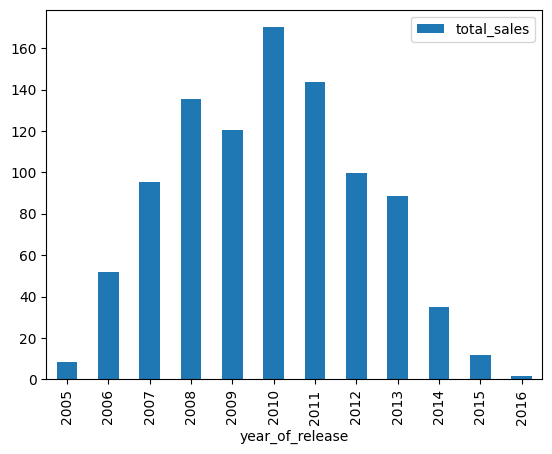

In [28]:
data.query('platform == "X360"').pivot_table(index='year_of_release', 
                                             values='total_sales', 
                                             aggfunc='sum').plot(kind='bar')

По платформе X360 продажи стартовали с 2005г, пик продаж наблюдался в период 2010-2011гг., затем следует спад. Даже учитывая, что за 2016г. неполные данные, можно сделать вывод, что в настоящее время платформа не актуальна.

<Axes: xlabel='year_of_release'>

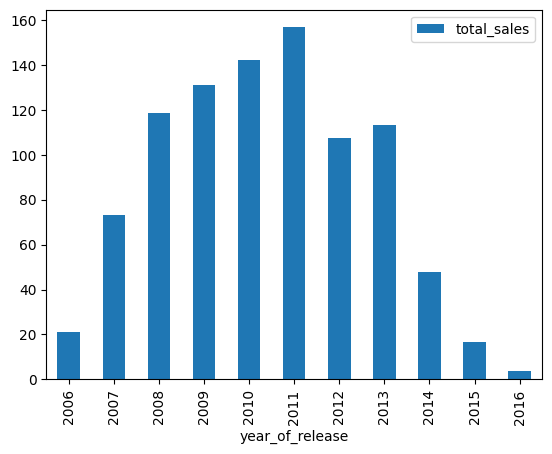

In [29]:
data.query('platform == "PS3"').pivot_table(index='year_of_release', 
                                            values='total_sales', 
                                            aggfunc='sum').plot(kind='bar')

По платформе PS3 продажи стартовали с 2006г, пик продаж наблюдался в период 2009-2011гг., затем следует спад. В 2015-2016гг. продажи данной платформы имеют минимальные значения.

<Axes: xlabel='year_of_release'>

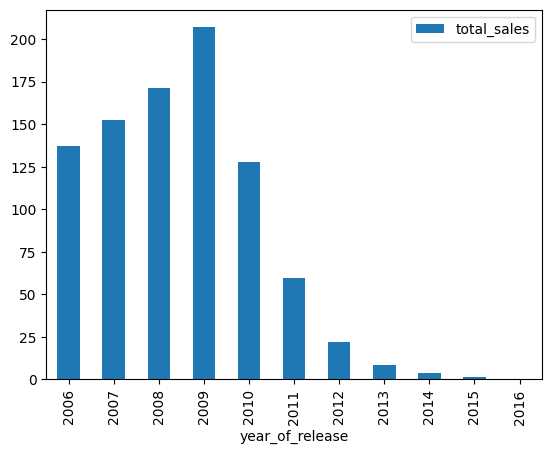

In [30]:
data.query('platform == "Wii"').pivot_table(index='year_of_release', 
                                            values='total_sales', 
                                            aggfunc='sum').plot(kind='bar')

По платформе Wii продажи начались в 2006г., очень быстро достигли своего максимума в 2008-2009, затем следует спад, в 2014-2015г. продажи практически прекратились, в настоящее время платформа не актуальна.

<Axes: xlabel='year_of_release'>

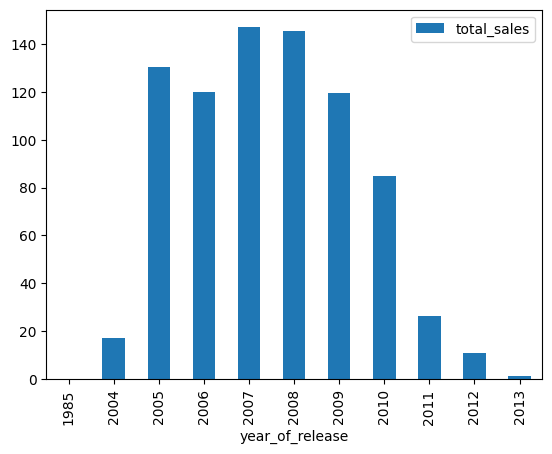

In [31]:
data.query('platform == "DS"').pivot_table(index='year_of_release', 
                                           values='total_sales', 
                                           aggfunc='sum').plot(kind='bar')

На графике первое значение замечено значительно меньше нежеши последущие, можно сделать вывод, что это выброс который стоит удалить

<Axes: ylabel='year_of_release'>

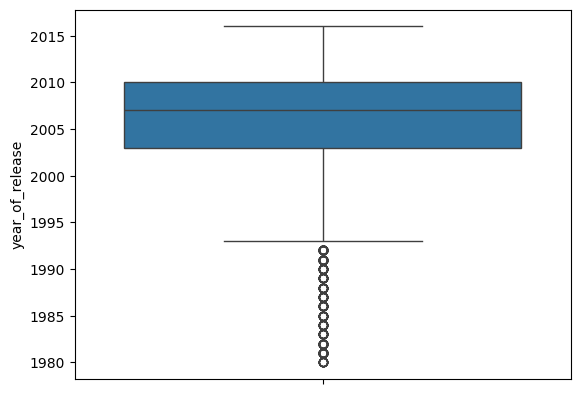

In [33]:
sns.boxplot(data['year_of_release'])


И правда, построив гистограмму размаха(ящик с усами) и здесь уже отчетливо видно, что есть выбросы, их стоит удалить

In [34]:
for x in ['year_of_release']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan  

In [35]:
# удаляем выбросы
data = data.dropna(axis = 0)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16139 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16139 non-null  object 
 1   platform         16139 non-null  object 
 2   year_of_release  16139 non-null  float64
 3   genre            16139 non-null  object 
 4   na_sales         16139 non-null  float64
 5   eu_sales         16139 non-null  float64
 6   jp_sales         16139 non-null  float64
 7   other_sales      16139 non-null  float64
 8   critic_score     16139 non-null  int32  
 9   user_score       16139 non-null  float64
 10  rating           16139 non-null  object 
 11  total_sales      16139 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.5+ MB


In [37]:
data['year_of_release'] = data['year_of_release'].astype('int') 

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16139 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16139 non-null  object 
 1   platform         16139 non-null  object 
 2   year_of_release  16139 non-null  int32  
 3   genre            16139 non-null  object 
 4   na_sales         16139 non-null  float64
 5   eu_sales         16139 non-null  float64
 6   jp_sales         16139 non-null  float64
 7   other_sales      16139 non-null  float64
 8   critic_score     16139 non-null  int32  
 9   user_score       16139 non-null  float64
 10  rating           16139 non-null  object 
 11  total_sales      16139 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.5+ MB


<Axes: xlabel='year_of_release'>

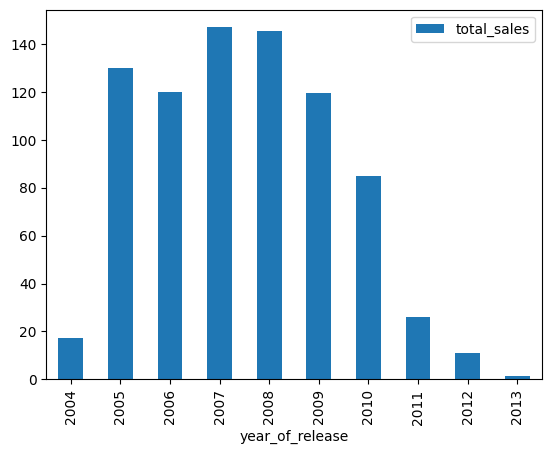

In [39]:
# продажи по платформe DS, распределение по годам.
data.query('platform == "DS"').pivot_table(index='year_of_release', 
                                           values='total_sales', 
                                           aggfunc='sum').plot(kind='bar')

Теперь все ок
<p>По платформе DS продажи начались в 2004г., очень быстро достигли своего максимума в 2005-2008, затем следует спад, в 2013 продажи практически прекратились, в настоящее время платформа не актуальна.

<Axes: xlabel='year_of_release'>

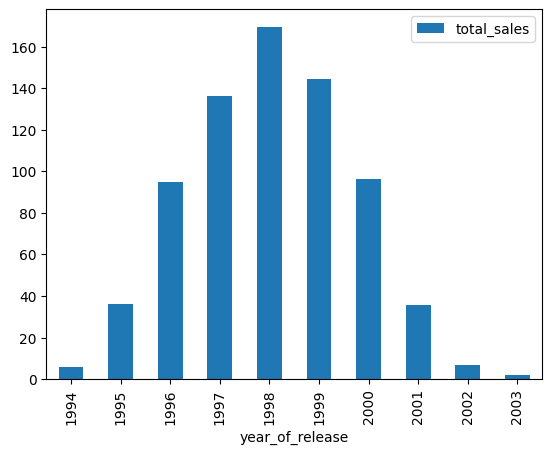

In [40]:
# продажи по платформe PS, распределение по годам.
data.query('platform == "PS"').pivot_table(index='year_of_release', 
                                           values='total_sales', 
                                           aggfunc='sum').plot(kind='bar')

Данная платформа PS самая "старая" из рассматриваемых, продажи начались в 1994г., своего максимума достигли в 1997-1999гг, затем идет спад продаж, в 2003 продажи практически прекратились, в настоящее время платформа не актуальна.

**За какой характерный срок появляются новые и исчезают старые платформы?**

Новые модели, если не брать в расчет PS2, появлялись с регулярностью в 1 год, за исключением двух последних платформ, которые появились одновременно.

В основном продолжительность жизни платформы составляет 5-6 лет, достаточно не плохо с расчетом на то, что после них появляются новые.

Исчезновение старых моделей так же было постепенно, относительно их появления, за исключением платформ Nintendo. Хоть они и появились в разные периоды, но эпоха Nintendo закончила в один год.

In [41]:
total_sales_per_platform = (data.groupby(['platform'],as_index = False)['total_sales'].sum()
                                 .sort_values('total_sales',ascending = False)
                           )

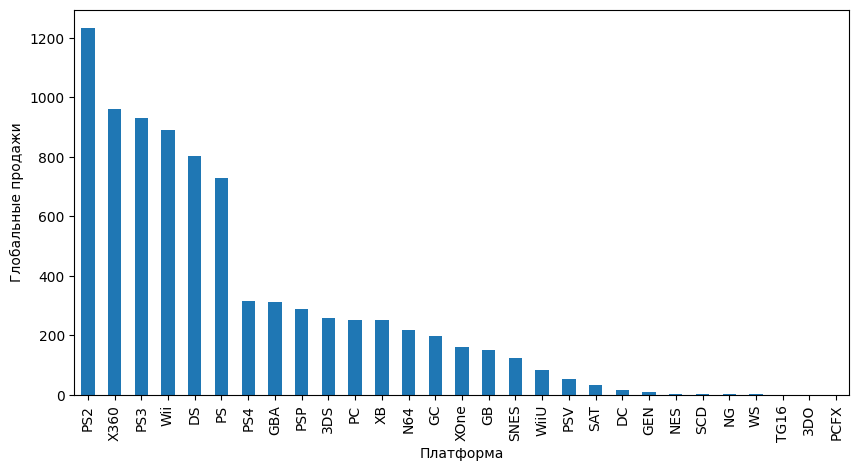

In [42]:
(total_sales_per_platform.plot(kind='bar',x='platform', y='total_sales',figsize=(10, 5),legend=False)
                         .set(xlabel='Платформа', ylabel='Глобальные продажи')
)
plt.show()

In [43]:
top_6_alltime = total_sales_per_platform .head(6)['platform'].tolist()
top_6_alltime

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

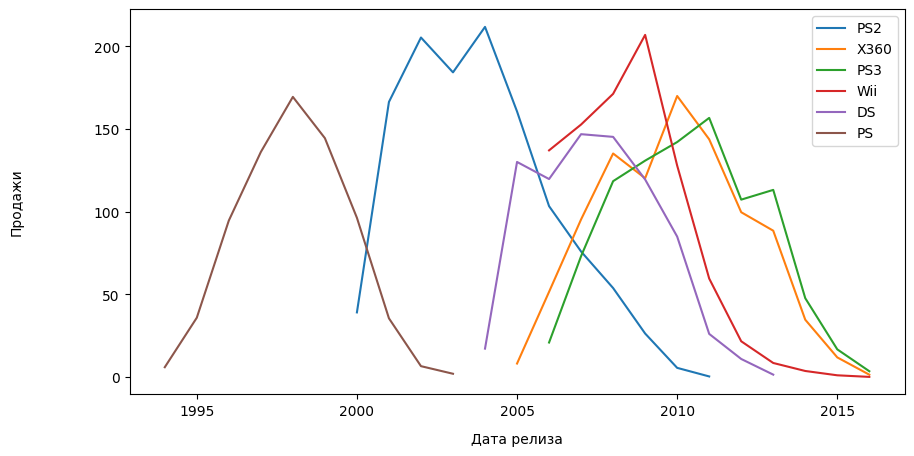

In [44]:
for name in top_6_alltime:
    data.query('platform == @name and year_of_release != -1').pivot_table(index = 'year_of_release',
                        values = 'total_sales', aggfunc = 'sum').sort_values('year_of_release',
                                                    ascending = False)['total_sales'].plot(figsize = (10, 5), label=name)
   
    plt.xlabel('Дата релиза', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 50)
    plt.legend()

По графику видим, что платформа появляется и исчезает в течение примерно 10 лет.
Таким образом для нашего прогноза целесообразно рассмотреть период за последние 5 лет, т.е те платформы которые набирают популярность, либо находятся на пике.

**Возьмите данные за соответствующий актуальный период:**
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

In [45]:
# отрезаем данные до 2014г. и сохраним данные за 2014, 2015, 2016гг. в таблице games_fresh
data_fresh = data.query('year_of_release >= 2014').copy()

**Какие платформы лидируют по продажам:** 
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

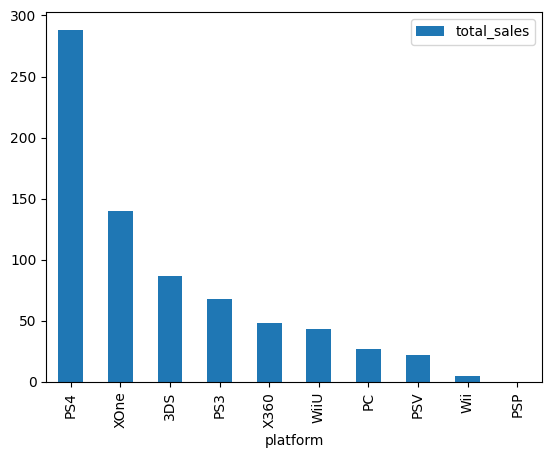

In [46]:
# построим график зависимости продаж от типа платформ за актуальный период 2014-2016
platform_sales_fresh = data_fresh.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending=False).plot(kind='bar')

Из данного графика можно сделать вывод, что за актуальный период лидируют по продажам платформы PS4, XOne, 3DS. Далее построим распределение платформ по годам.

<Axes: xlabel='year_of_release'>

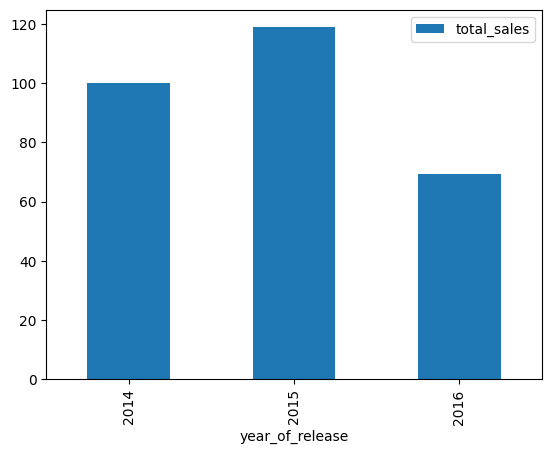

In [47]:
# продажи по платформe PS4, распределение по годам.
data_fresh.query('platform == "PS4"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar')

Учитывая что данные за 2016г. неполные, можно сделать вывод, что по данной платформе продажи находятся на одном уровне, ее стабильно много покупают последние три года.

<Axes: xlabel='year_of_release'>

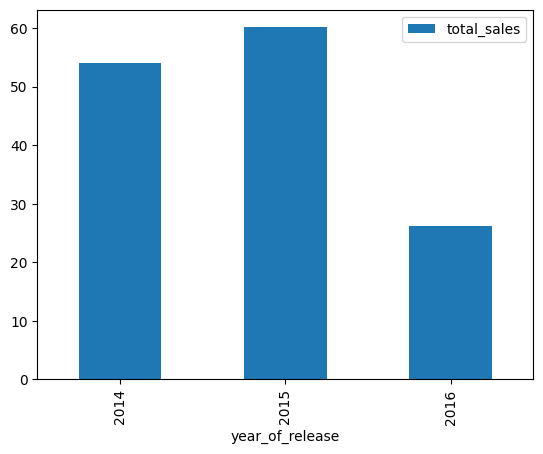

In [48]:
# продажи по платформе XOne, распределение по годам
data_fresh.query('platform == "XOne"').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar')

Также учитывая неполноту данных за 2016г., продажи находятся на одном уровне, ее стабильно покупают последние три года, но количество продаж в 2 раза меньше платформы PS4.

<Axes: xlabel='year_of_release'>

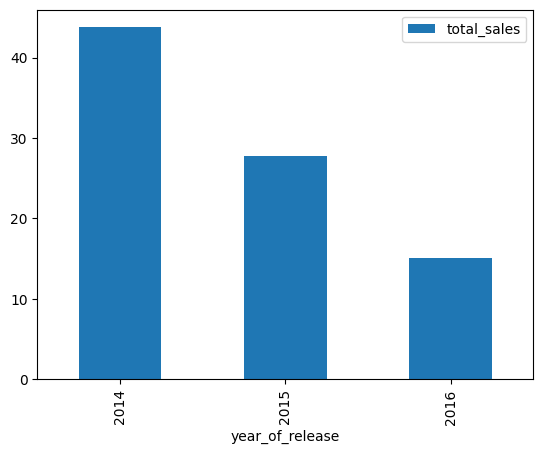

In [49]:
# продаэжи по платформе 3DS, распределение по годам
data_fresh.query('platform == "3DS"').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar')

По данной платформе наблюдается незначительный спад продаж, около 30 процентов ежегодно.

<Axes: xlabel='year_of_release'>

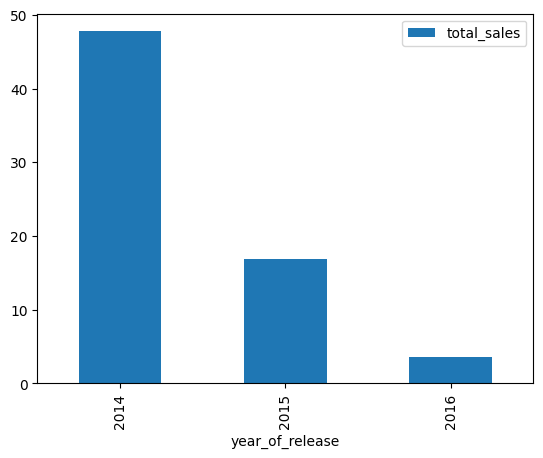

In [50]:
# продаэжи по платформе PS3, распределение по годам
data_fresh.query('platform == "PS3"').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar')

Из графика видно, что в 2015г. продажи резко упали относительно 2014г., а в 2016г. продажи практически прекратились. На смену данной платформе PS3 пришла более современная PS4.

<Axes: xlabel='year_of_release'>

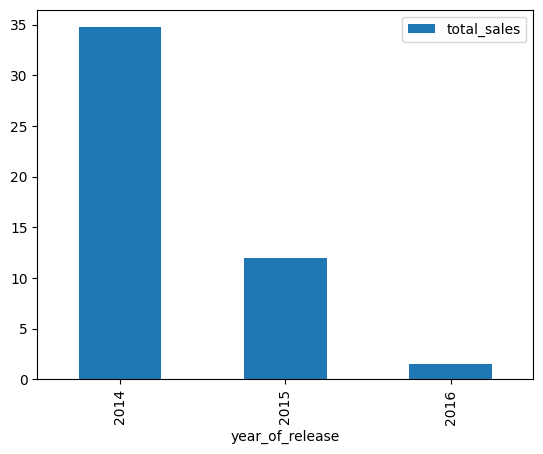

In [51]:
# продаэжи по платформе X360, распределение по годам
data_fresh.query('platform == "X360"').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar')

Аналогичная ситуация наблюдается у данной платфоры, в 2016 ее уже никто не покупает.

<Axes: xlabel='year_of_release'>

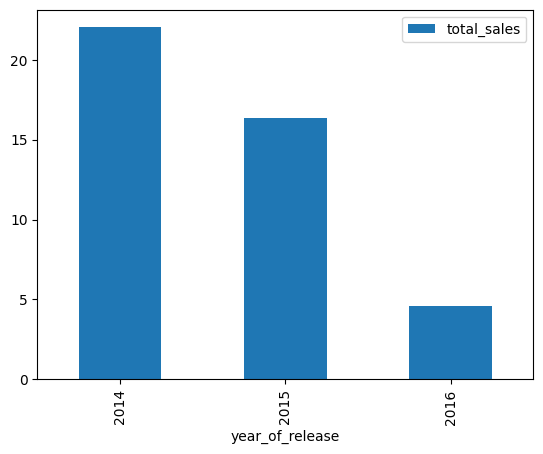

In [52]:
# продаэжи по платформе WiiU, распределение по годам
data_fresh.query('platform == "WiiU"').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar')

<Axes: xlabel='year_of_release'>

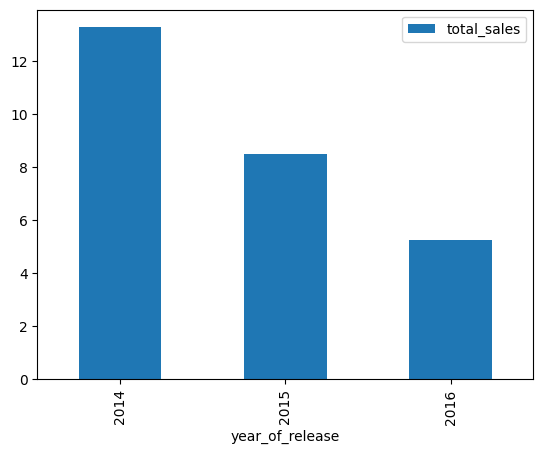

In [53]:
# продаэжи по платформе PC, распределение по годам
data_fresh.query('platform == "PC"').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar')

<Axes: xlabel='year_of_release'>

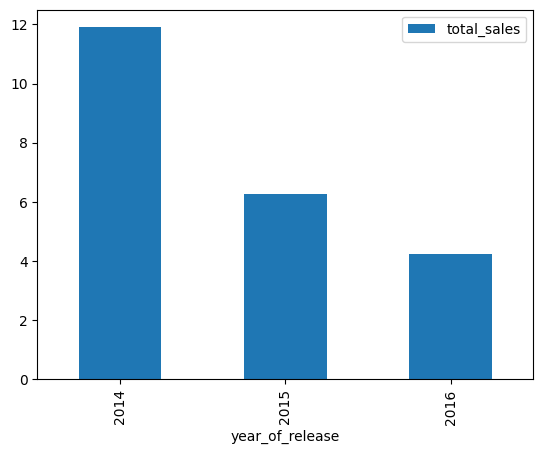

In [54]:
# продаэжи по платформе PSV, распределение по годам
data_fresh.query('platform == "PSV"').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar')

<Axes: xlabel='year_of_release'>

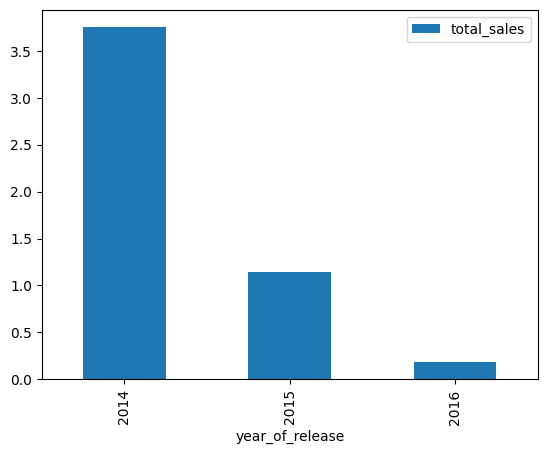

In [55]:
# продаэжи по платформе Wii, распределение по годам
data_fresh.query('platform == "Wii"').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar')

У платформ WiiU, PC, PSV, Wii изначально в 2014г. были относительно небольшие продажи, которые постепенно снижаются в 2015 и продолжают снижаться 2016г.

<Axes: xlabel='year_of_release'>

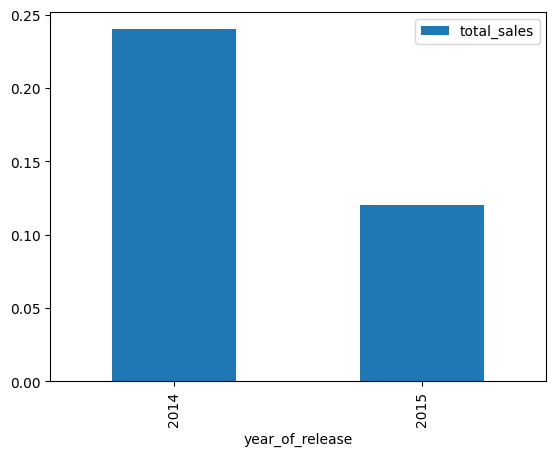

In [56]:
# продаэжи по платформе PSP, распределение по годам
data_fresh.query('platform == "PSP"').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar')

По данной платформе продажи в 2016г. прекратились, в настоящее время не актуальна.

**Какие платформы можно оставить для анализа?**
<p>По результатам анализа количества продаж платформ за актуальный период, при дальнейшей обработке и анализе имеет смысл не учитывать платформы с минимальными продажами. Минимальные продажи у платформ PS3, X360, Wii, PSP.</p>

In [57]:
# data_fresh = data_fresh.query('platform not in["PS3", "X360", "Wii", "PSP"]')
data_fresh['platform'].value_counts() # проверка

platform
PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
Name: count, dtype: int64

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам:**

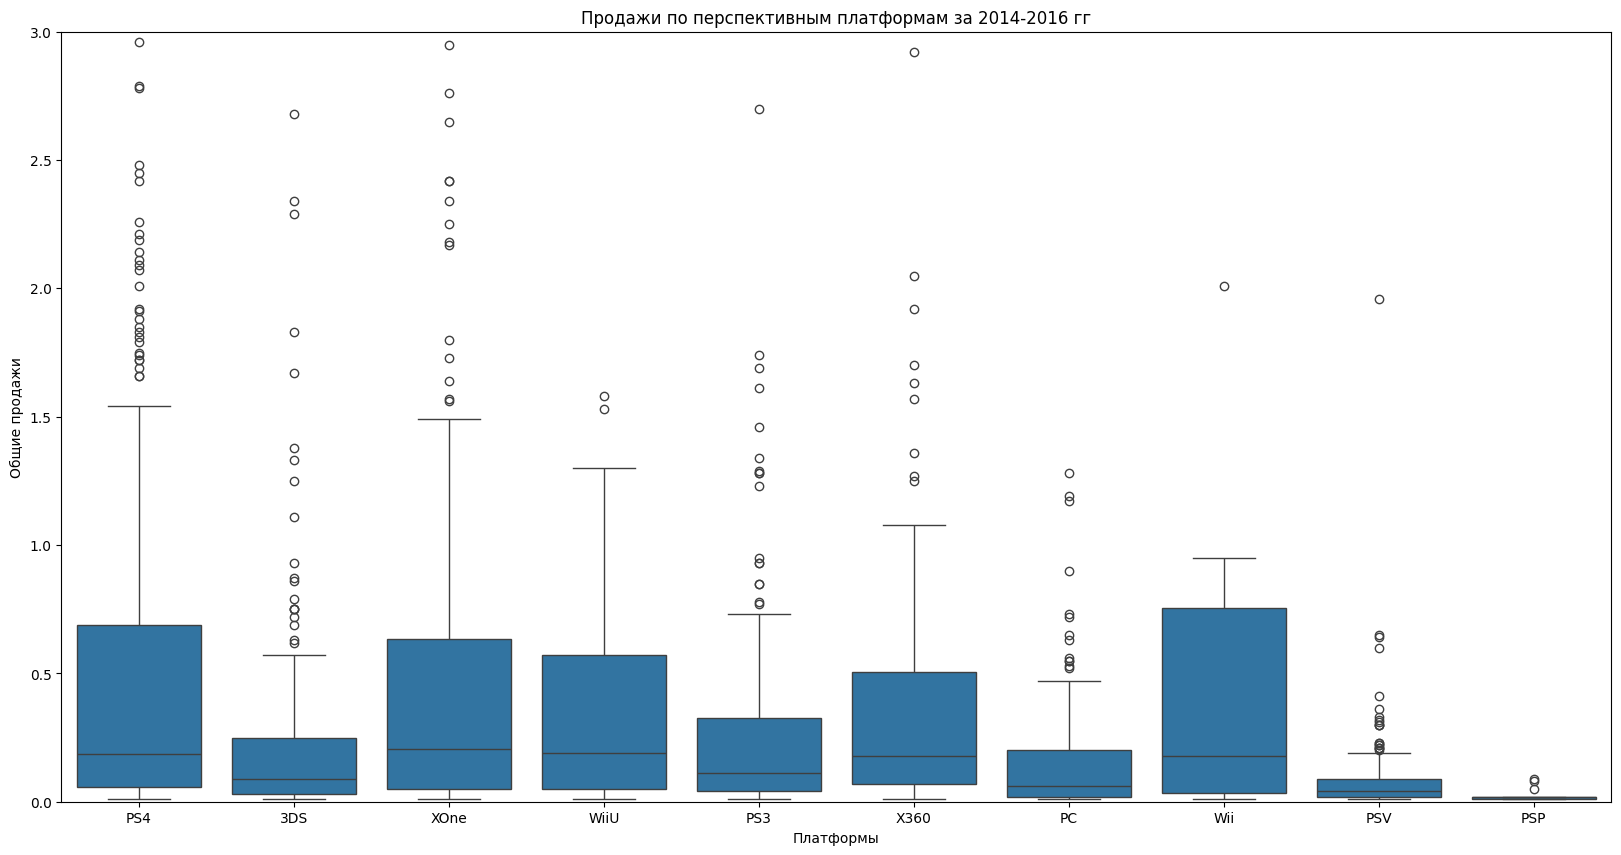

In [58]:
# построим график по глобальным продажам игр в разбивке по платформам 
mustache = plt.figure(figsize = (20,10))
sns.boxplot(data = data_fresh, y = 'total_sales', x='platform').set(title = 'Продажи по перспективным платформам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3))
plt.show()

In [59]:
data_fresh.pivot_table(index = 'platform', values = ['total_sales'], aggfunc = ['var', 'median', 'mean'])

,var,median,mean
,total_sales,total_sales,total_sales
platform,,,
3DS,1.412219,0.090,0.408868
PC,0.108477,0.060,0.179139
PS3,0.400764,0.110,0.311324
PS4,2.608124,0.185,0.766356
PSP,0.000769,0.020,0.027692
PSV,0.020048,0.040,0.075932
Wii,0.391189,0.180,0.460909
WiiU,1.349005,0.190,0.588767


**Вывод:** Из графика «ящик с усами» видно, что практически по всем платформам существуют выбросы дальше третьих квартилей. У платформ PS4, WiiU и XOne одинаковы медианные значения продаж (0.185, 0.190, 0.205 соответственно), также приблизительно равны среднее арифметическое значение продаж (0.766356, 0.588767, 0.615614 соответственно). Из данного анализа следует, что большей популярностью пользуются уже вышеуказанные платформы PS4, WiiU и XOne.

**Как влияют на продажи внутри одной популярной платформы:**

* посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

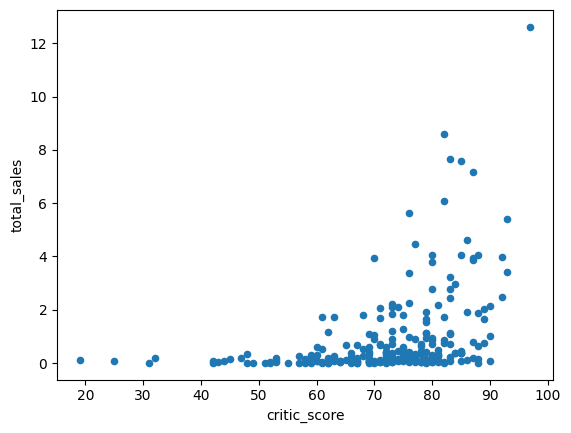

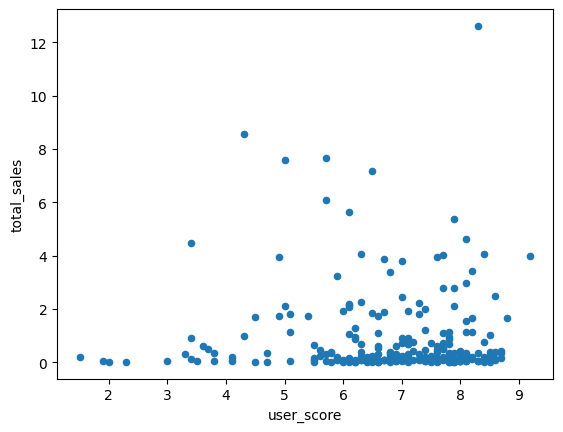

critic_score    0.401903
user_score     -0.043186
total_sales     1.000000
Name: total_sales, dtype: float64


In [60]:
# Построим диаграмму рассеяния для платформы PS4, уберем оценку (-10) в отзывах пользователей и критиков
data_platform = data_fresh.query('platform == "PS4"')
data_platform[data_platform['critic_score'] != -10].plot(kind='scatter', x='critic_score', y='total_sales')
data_platform[data_platform['user_score'] != -10].plot(kind='scatter', x='user_score', y='total_sales')
plt.show()
# Расчет коэффициента корреляции
print(data_platform[(data_platform['critic_score'] != -10) & (data_platform['user_score'] != -10)][['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])


**Вывод:** Оценка критиков для платформы PS4 имеет слабое влияние на продажи (коэфф. 0,4), оценка пользователей на продажи не влияет

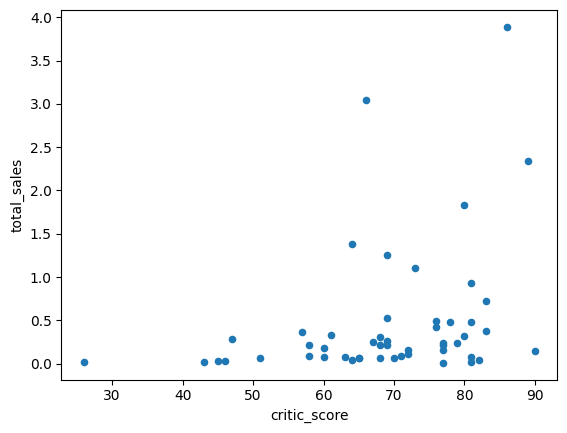

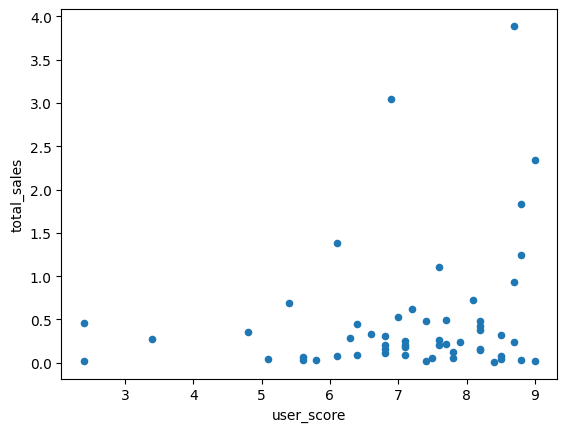

critic_score    0.284686
user_score      0.279850
total_sales     1.000000
Name: total_sales, dtype: float64


In [61]:
# Построим диаграмму рассеяния для платформы 3DS
data_platform = data_fresh.query('platform == "3DS"')
data_platform[data_platform['critic_score'] != -10].plot(kind='scatter', x='critic_score', y='total_sales')
data_platform[data_platform['user_score'] != -10].plot(kind='scatter', x='user_score', y='total_sales')
plt.show()
# Расчет коэффициента корреляции
print(data_platform[(data_platform['critic_score'] != -10) & (data_platform['user_score'] != -10)][['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

**Вывод:** Оценка критиков для платформы 3DS имеет очень слабое влияние на продажи (28 процентов), оценка пользователей также имеет очень слабое влияние.

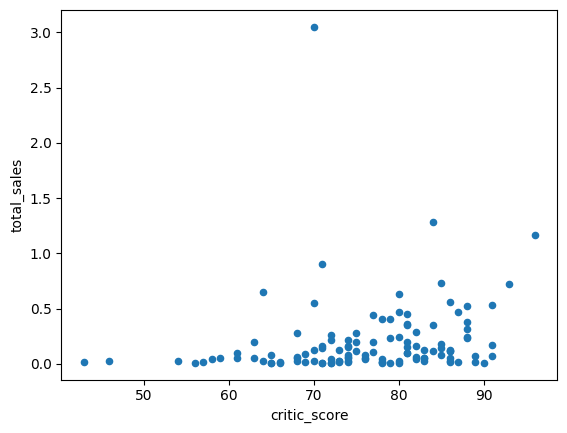

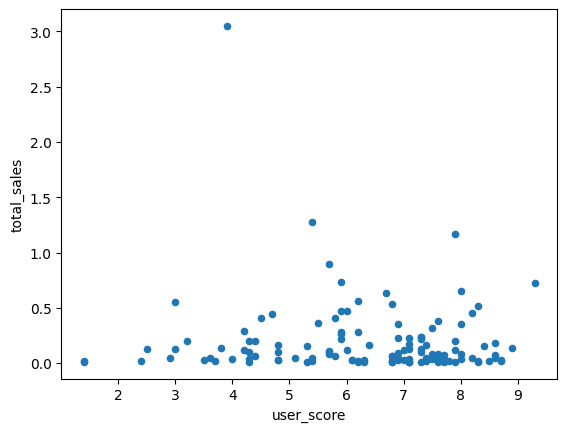

critic_score    0.172061
user_score     -0.089974
total_sales     1.000000
Name: total_sales, dtype: float64


In [62]:
# Построим диаграмму рассеяния для платформы PC
data_platform = data_fresh.query('platform == "PC"')
data_platform[data_platform['critic_score'] != -10].plot(kind='scatter', x='critic_score', y='total_sales')
data_platform[data_platform['user_score'] != -10].plot(kind='scatter', x='user_score', y='total_sales')
plt.show()
# Расчет коэффициента корреляции
print(data_platform[(data_platform['critic_score'] != -10) & (data_platform['user_score'] != -10)][['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

**Вывод:** Оценка критиков для платформы PC не имеет влияние на продажи (17 процентов), оценка пользователей на продажи не влияет.

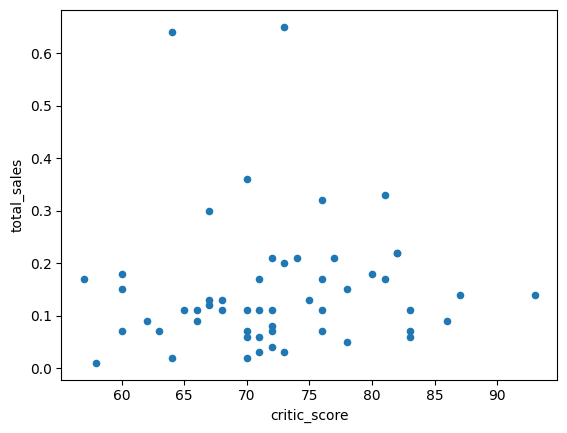

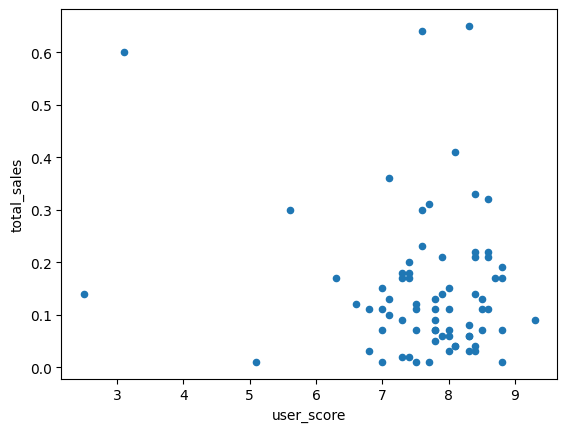

critic_score    0.041029
user_score      0.023528
total_sales     1.000000
Name: total_sales, dtype: float64


In [63]:
# Построим диаграмму рассеяния для платформы PSV
data_platform = data_fresh.query('platform == "PSV"')
data_platform[data_platform['critic_score'] != -10].plot(kind='scatter', x='critic_score', y='total_sales')
data_platform[data_platform['user_score'] != -10].plot(kind='scatter', x='user_score', y='total_sales')
plt.show()
# Расчет коэффициента корреляции
print(data_platform[(data_platform['critic_score'] != -10) & (data_platform['user_score'] != -10)][['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

**Вывод:** Оценка критиков для платформы PSV имеет слабое влияние на продажи, оценка пользователей имеет очень слабое влияние

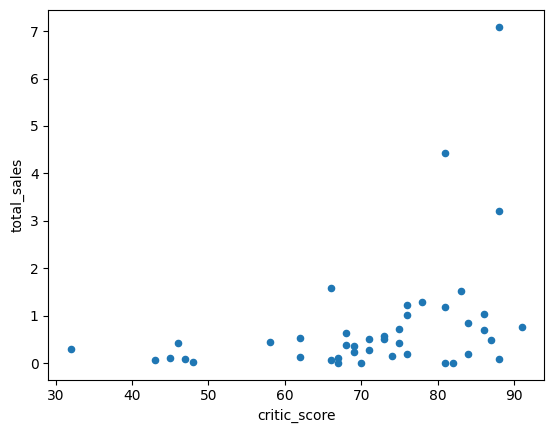

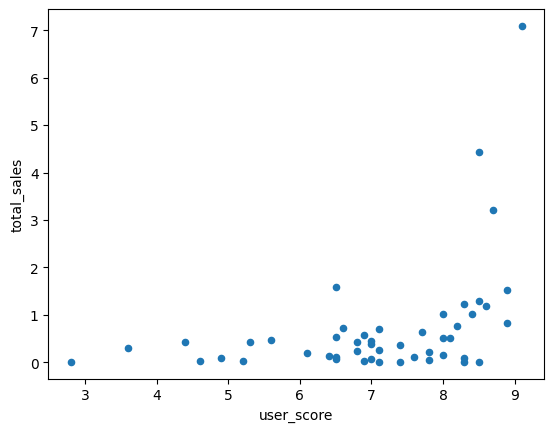

critic_score    0.375640
user_score      0.411451
total_sales     1.000000
Name: total_sales, dtype: float64


In [64]:
# Построим диаграмму рассеяния для платформы WiiU
data_platform = data_fresh.query('platform == "WiiU"')
data_platform[data_platform['critic_score'] != -10].plot(kind='scatter', x='critic_score', y='total_sales')
data_platform[data_platform['user_score'] != -10].plot(kind='scatter', x='user_score', y='total_sales')
plt.show()
# Расчет коэффициента корреляции
print(data_platform[(data_platform['critic_score'] != -10) & (data_platform['user_score'] != -10)][['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

**Вывод:** Оценка критиков для платформы WiiU имеет слабое влияние на продажи, оценка пользователей также имеет слабое влияние

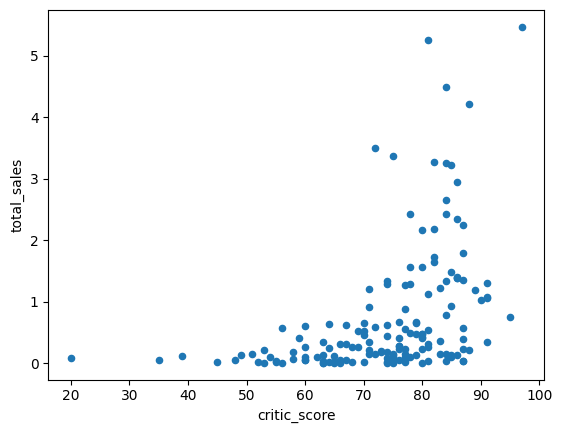

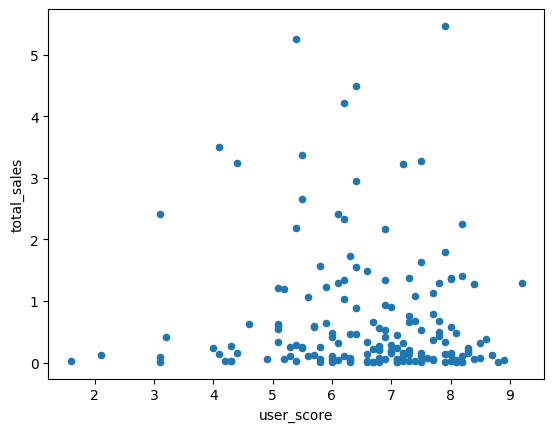

critic_score    0.422112
user_score     -0.091734
total_sales     1.000000
Name: total_sales, dtype: float64


In [65]:
# Построим диаграмму рассеяния для платформы XOne
data_platform = data_fresh.query('platform == "XOne"')
data_platform[data_platform['critic_score'] != -10].plot(kind='scatter', x='critic_score', y='total_sales')
data_platform[data_platform['user_score'] != -10].plot(kind='scatter', x='user_score', y='total_sales')
plt.show()
# Расчет коэффициента корреляции
print(data_platform[(data_platform['critic_score'] != -10) & (data_platform['user_score'] != -10)][['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

**Вывод:** Оценка критиков для платформы XOne имеет слабое влияние на продажи, оценка пользователей на продажи не влияет

**Вывод общ.:** Из построенных выше диаграмм рассеяния и расчета коэффициента корреляции по каждой платформе между отзывами и продажами видно, что оценки критиков для всех платформ практически не влияют или имеют очень слабое влияние на продажи. Оценки пользователей имеют очень слабое влияние на продажи и не влияют совсем.

**Общее распределение игр по жанрам:**

* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [66]:
# сделаем сводную по жанрам и продажам, отсортируем, чтобы увидеть самые прибыльные
genre_pivot=data.pivot_table('total_sales', 
                index = 'genre', 
                aggfunc = ['sum','count','mean'])
                           
genre_pivot

,sum,count,mean
,total_sales,total_sales,total_sales
genre,,,
Action,1648.43,3232,0.510034
Adventure,214.06,1285,0.166584
Fighting,419.80,825,0.508848
Misc,776.83,1710,0.454287
Platform,659.27,830,0.794301
Puzzle,163.07,539,0.302542
Racing,694.95,1213,0.572918
Role-Playing,901.19,1460,0.617253


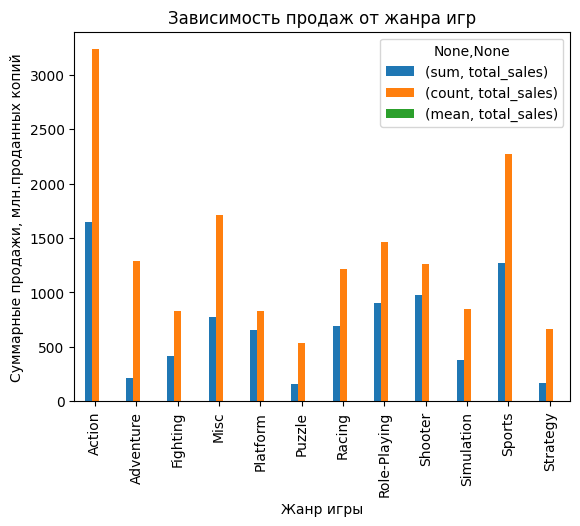

In [67]:
# нарисуем столбчатую диаграмму
genre_pivot.plot(kind='bar')                         
plt.title('Зависимость продаж от жанра игр')
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Жанр игры')
plt.show()

Вывод:
С большим отрывом лидирует жанр по кол-ву продаж и сумме продаж- Action. на 2-м месте - Sports...Менее популярны - Puzzle, Adventure, Strategy. По среднему колву продаж лидируют - Platform, Shooter, Role-Playing.

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16139 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16139 non-null  object 
 1   platform         16139 non-null  object 
 2   year_of_release  16139 non-null  int64  
 3   genre            16139 non-null  object 
 4   na_sales         16139 non-null  float64
 5   eu_sales         16139 non-null  float64
 6   jp_sales         16139 non-null  float64
 7   other_sales      16139 non-null  float64
 8   critic_score     16139 non-null  int64  
 9   user_score       16139 non-null  float64
 10  rating           16139 non-null  object 
 11  total_sales      16139 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [68]:
# сделаем сводную по жанрам и продажам, отсортируем, чтобы увидеть самые прибыльные
genre_pivot=data.pivot_table('total_sales', 
                index = 'genre', 
                aggfunc = ['sum','count','mean'])
                           
genre_pivot

,sum,count,mean
,total_sales,total_sales,total_sales
genre,,,
Action,1648.43,3232,0.510034
Adventure,214.06,1285,0.166584
Fighting,419.80,825,0.508848
Misc,776.83,1710,0.454287
Platform,659.27,830,0.794301
Puzzle,163.07,539,0.302542
Racing,694.95,1213,0.572918
Role-Playing,901.19,1460,0.617253


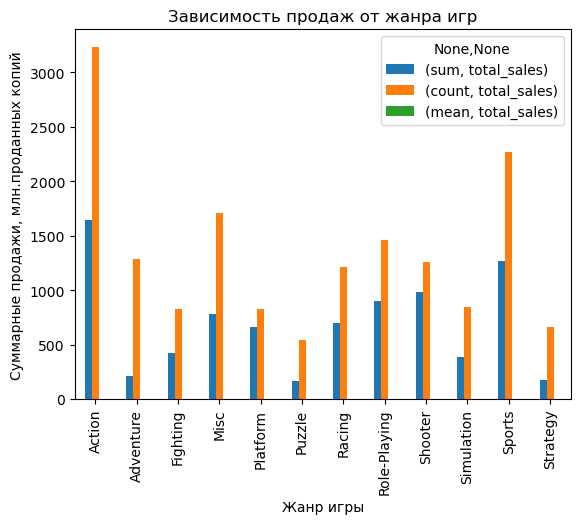

In [69]:
# нарисуем столбчатую диаграмму
genre_pivot.plot(kind='bar')                         
plt.title('Зависимость продаж от жанра игр')
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Жанр игры')
plt.show()

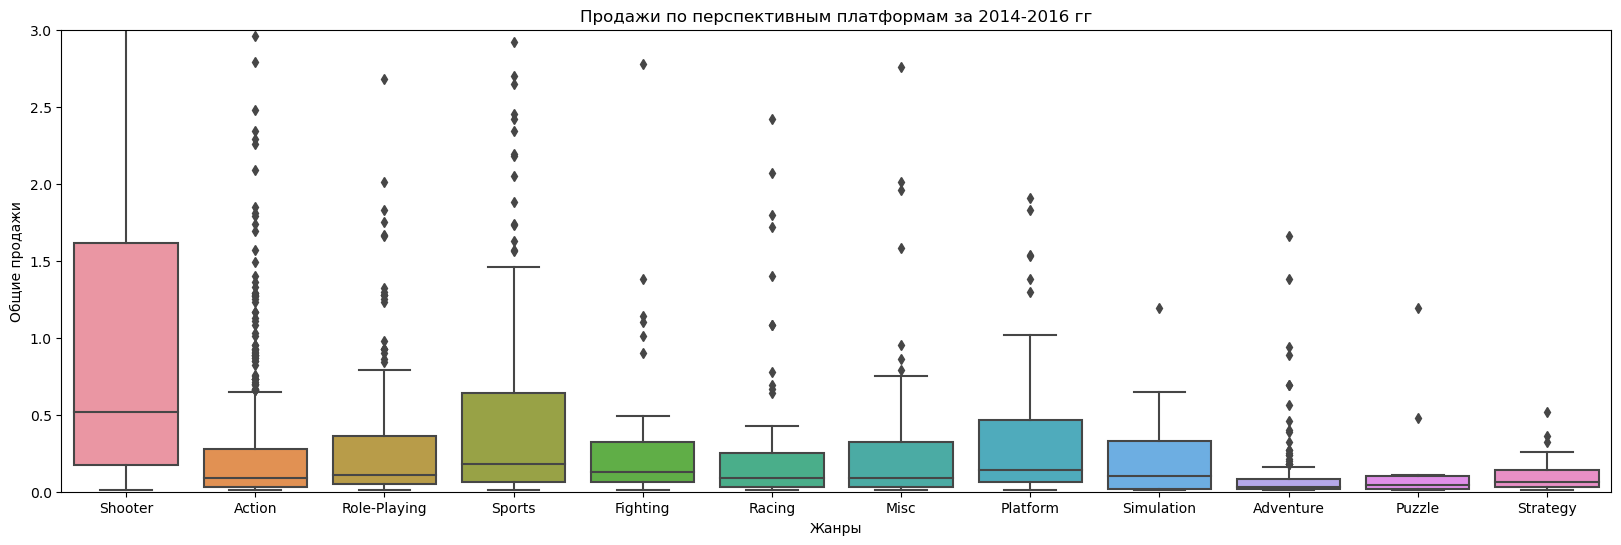

In [70]:
# построим график по глобальным продажам игр в разбивке по платформам 
mustache = plt.figure(figsize = (20,6))
sns.boxplot(data = data_fresh, y = 'total_sales', x='genre').set(title = 
        'Продажи по перспективным платформам за 2014-2016 гг', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 3))
plt.show()

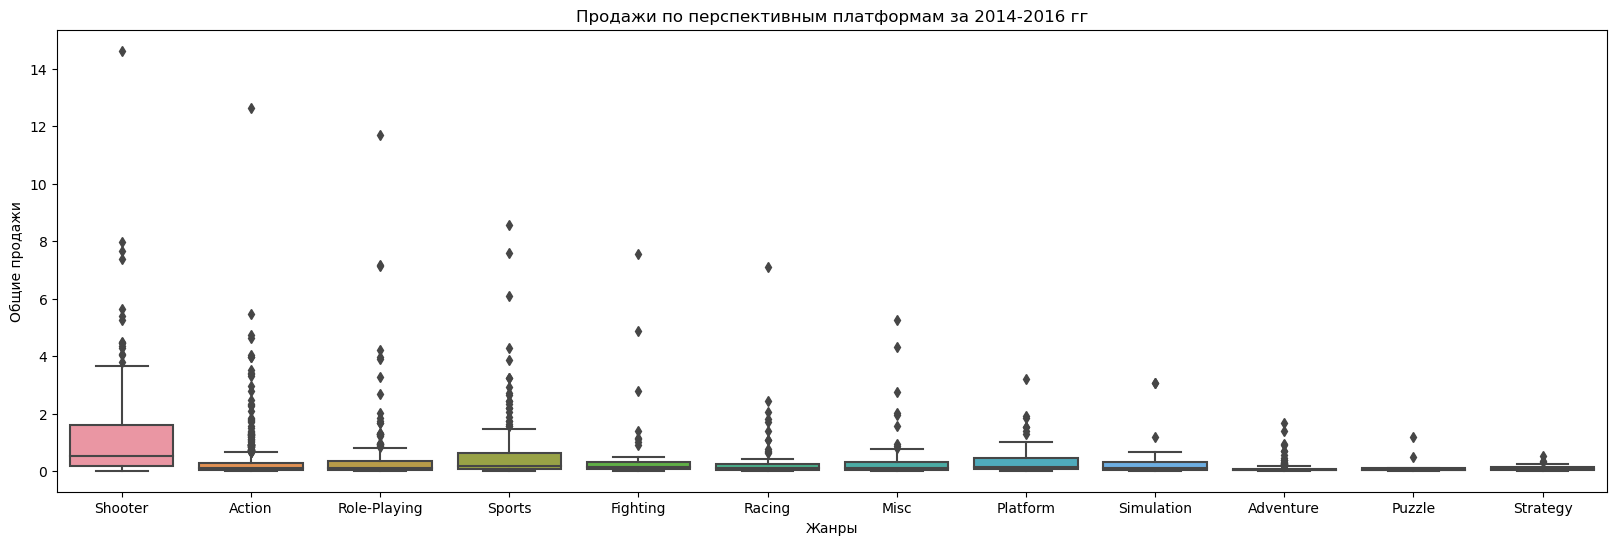

In [71]:
# check

mustache = plt.figure(figsize = (20,6))
sns.boxplot(data = data_fresh, y = 'total_sales', x='genre').set(title = 
        'Продажи по перспективным платформам за 2014-2016 гг', xlabel = 'Жанры', ylabel = 'Общие продажи')
plt.show()

**Вывод:**
С большим отрывом лидирует жанр по кол-ву продаж и сумме продаж- Action. на 2-м месте - Sports...Менее популярны - Puzzle, Adventure, Strategy. По среднему колву продаж лидируют - Platform, Shooter, Role-Playing.

# Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [72]:
# создадим список регионов
regions = ['na_sales','eu_sales','jp_sales']
df_since2012=data.query('year_of_release >= 2012')

In [73]:
# посмотрим для себя где и как продается всё
print("Суммарные продажи, млн.проданных копий в регионе")
for reg in regions:
    sum_region=df_since2012[reg].sum()     
    print(reg, round(sum_region))

Суммарные продажи, млн.проданных копий в регионе
na_sales 591
eu_sales 507
jp_sales 193


**Самые популярные платформы (топ-5). Опишите различия в долях продаж:**

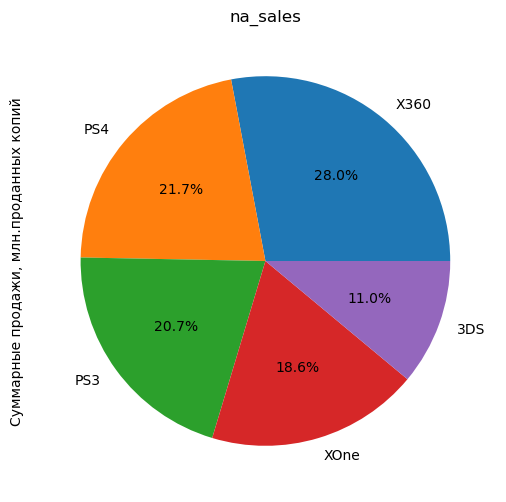

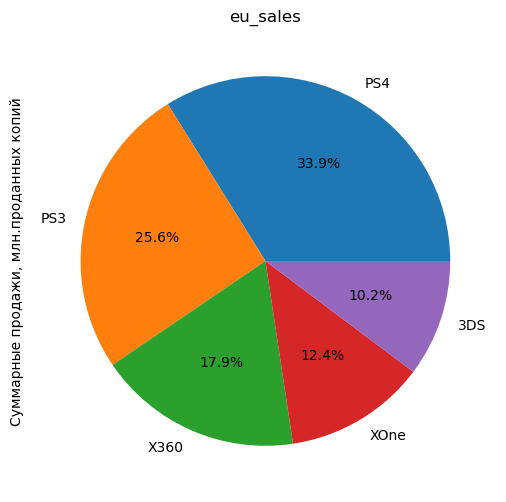

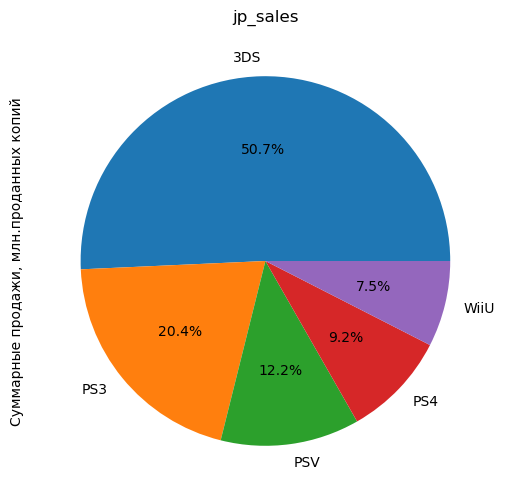

In [74]:
# создадим цикл для быстрого вывода для каждого региона
for reg in regions:
    (df_since2012.pivot_table(index='platform', values=reg, aggfunc='sum')
                .sort_values(reg, ascending=False).head(5)
                .plot(kind='pie', y=reg, figsize=(6, 6), legend=False, title = reg, autopct='%1.1f%%')
                .set(ylabel='Суммарные продажи, млн.проданных копий')
    )
    plt.show()

**Вывод:**
У жителей данных регионов разные предпочтения в выборе платформ. Самая популярная в Северной Америке - X360, В Европе - PS4, в Японии c существенным отрывом- 3DS.



**Самые популярные жанры (топ-5). Поясните разницу:**

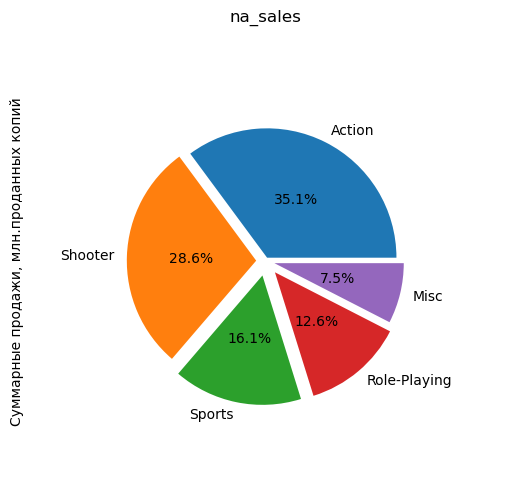

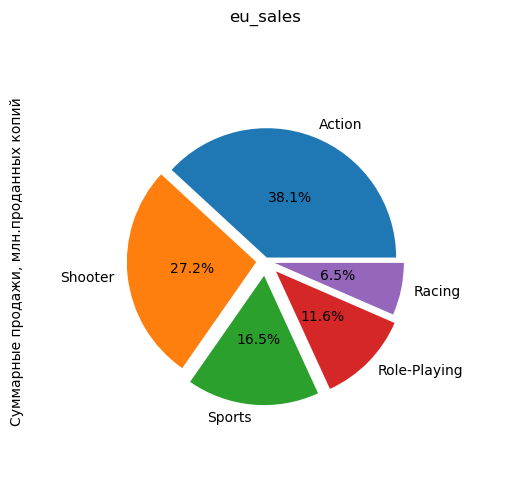

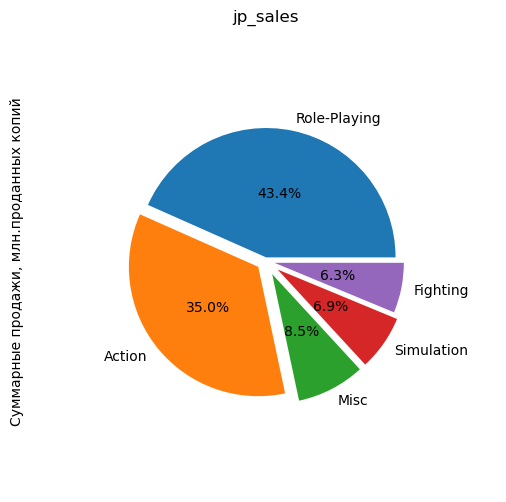

In [75]:
for reg in regions:
    (df_since2012.pivot_table(index='genre', values=reg, aggfunc='sum')
                .sort_values(reg, ascending=False).head(5)
                .plot(kind='pie', y=reg, figsize=(6, 6), legend=False, pctdistance=0.5, 
                      labeldistance=1.1, radius=0.7, title = reg, autopct='%1.1f%%', explode = [0.02, 0.05, 0.08, 0.08, 0.05])
                .set(ylabel='Суммарные продажи, млн.проданных копий')
    )
    plt.show()

**Вывод:**
Самый популярный жанр в Северной Америке и в Европе - Action, а в Японии- Pole-Playing.

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?:**

In [76]:
#посмотрим уникальные значения
spisok_raiting=data['rating'].unique()
spisok_raiting


array(['E', 'Unknown', 'M', 'T', 'E10+'], dtype=object)

In [77]:
# создадим новый список с расшифрованными названиями
new_raiting=['Для всех', 'undefined', 'Для взрослых', 'Подросток','Для всех от 10 лет и старше','Для детей – для тех, кто уже научился говорить и держать джойстик','Только для взрослых','Для детей младшего возраста','Рейтинг ожидается']
new_raiting

['Для всех',
 'undefined',
 'Для взрослых',
 'Подросток',
 'Для всех от 10 лет и старше',
 'Для детей – для тех, кто уже научился говорить и держать джойстик',
 'Только для взрослых',
 'Для детей младшего возраста',
 'Рейтинг ожидается']

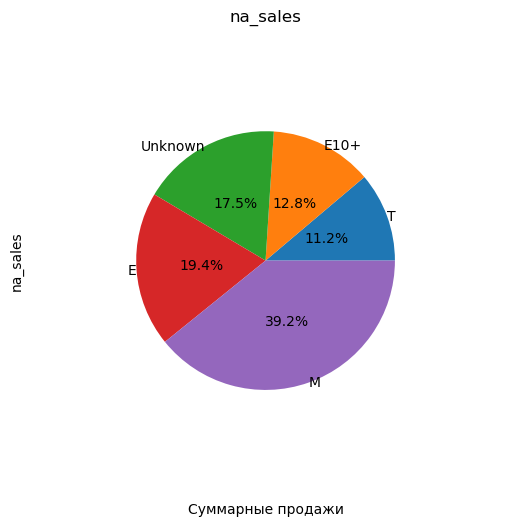

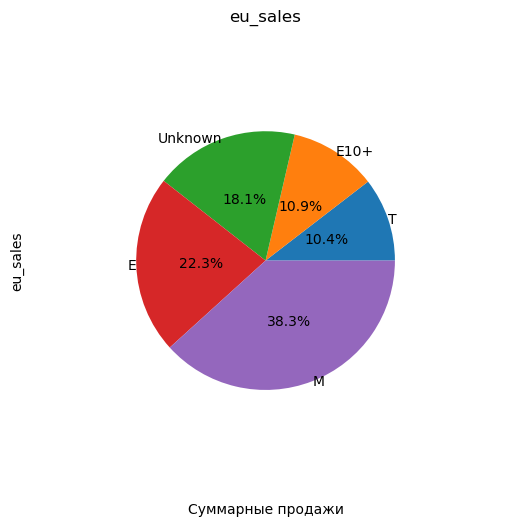

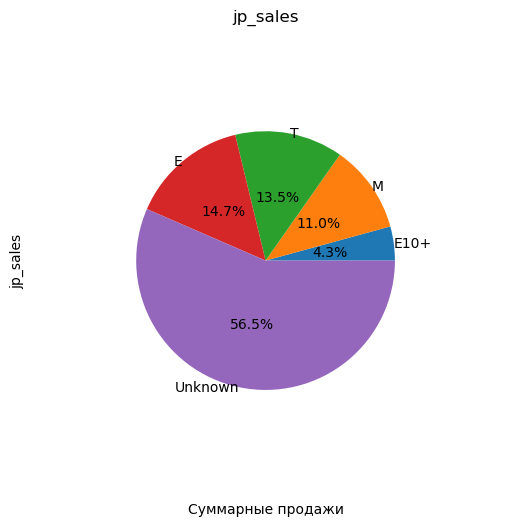

In [78]:
rating_actual= data.query('rating != "undefined" and rating != "Рейтинг ожидается" and year_of_release >= 2012')
for reg in regions:
    (rating_actual.pivot_table(index='rating', values=reg, aggfunc='sum')
                .sort_values(reg, ascending=True).tail(5)
                .plot(kind='pie', y=reg, figsize=(6, 6), legend=False, pctdistance=0.5, 
                      labeldistance=1, radius=0.7, title = reg, autopct='%1.1f%%')
                .set(xlabel='Суммарные продажи')
    )
    plt.show()

**Вывод:**
Портреты пользователей из каждого региона:

Средне-статистический пользователь из Северной Америки пользуется, в основном, платформами X360 и PS4, предпочитает игровые жанры "Action" и "Shoter" и игры с рейтингом "Для взрослых".

Средне-статистический пользователь из Европы предпочитает платформы PS4 и PS3, жанры "Action" и "Shoter" и игры с рейтингом "Для взрослых".

Средне-статистический пользователь из Японии отдает своё предпочтение платформе 3DS, жанру "Role-Playing" и "Action", рейтингу "Для всех".




#  Проверка гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<p>Задайте самостоятельно пороговое значение alpha.</p>
<P>Поясните:</p>

* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.

**Нулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Альтернативная гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [79]:
# удаляем значения-заглушки
data_fresh[data_fresh['user_score'] != -10]

results = st.ttest_ind(data_fresh.query('platform == "XOne"')['user_score'], data_fresh.query('platform == "PC"')['user_score'])

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.12481511051825932
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Нет причин признать, собственно что средние пользовательские рейтинги платформ Xbox One и PC значимо отличаются. Берем на себя нулевую догадку, p-значение более смысла alpha, собственно что выделяет базу принять подозрение об недоступности различий меж средними пользовательскими рейтингами платформ Xbox One и PC

Полученное значение p-value говорит о том, что хотя средние рейтинги платформ Xbox One и PC незначительно отличаются, с вероятностью в почти 62% такое различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами.
Таким образом, рейтинги платформ Xbox One и PC одинаковые и наша гипотеза подтвердилась.

In [80]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


**Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Альтернативная гипотеза:** Средние пользовательские рейтинги жанров Action и Sports различаются.

In [81]:
results = st.ttest_ind(data_fresh.query('genre == "Action"')['user_score'], data_fresh.query('genre == "Sports"')['user_score'])

alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.690722894578082e-08
Отвергаем нулевую гипотезу


**Вывод:** 
Берем на себя альтернативную догадку, p-значение довольно не достаточно, собственно что выделяет базу отторгнуть подозрение об недоступности различий меж cредними пользовательскими рейтингами жанров Action и Sports.

# Общий вывод:

<big><big>**В ходе выполнения данного проекта:**</big></big>

* Проведен обзор данных и выполнена предобработка данных, выявлены недостатки в данных, были обработаны пропуски, в некоторых случаях строки были удалены за ненадобностью, в некоторых пропуски были заменены на значение заглушку (-10), также были расчитаны суммарные продажи по регионам и записаны в отдельный столбец 'total_sales'.


<big><big>**Проведен исследовательский анализ данных:**</big></big>

* Построен график количества игр выпускавшихся в разные годы.
* Построен график как менялись продажи по платформам. Указаны платформы с наибольшими продажами и распределение по годам.
* По итогам анализа данных, выбран соответствующий актуальный период.
* Построен график зависимости продаж от типа платформ за актуальный период.
* Построен график «ящик с усами» по продажам игр в разбивке по платформам.
* Проведен анализ влияния на продажи отзывов пользователей и критиков. Построена диаграмма рассеяния и расчитан коэффициент корреляции между отзывами и продажами


<big><big>**Вывод:**</big></big>

* Начиная с 2000 года начался рост количества игр, с 2002 по 2004 небольшой "застой", а затем резкий скачок до 2008-2009г, где наблюдался пик количества игр, затем наступил спад вплоть до 2016г.
* Платформы с наибольшими суммарными продажами, PS2, X360, PS3, Wii, DS, PS. Данные 6 платформ выделяются от всех остальных наибольшими суммарными продажами.
* В целях формирования прогноза на 2017 года имеет смысл проводить анализ по последние 2-3 года c сохранением данных за 2016г. Выбран соответствующий актуальный период 2014-2016гг.
* По результатам анализа количества продаж за актуальный период, при дальнейшей обработке и анализе имеет смысл не учитывать платформы с минимальными продажами. Минимальные продажи у платформ PS3, X360, Wii, PSP.
* Из анализа графика «ящик с усами» следует, что большей популярностью пользуются платформы PS4, WiiU и XOne. У платформ PS4, WiiU и XOne одинаковы медианные значения продаж (0.185, 0.190, 0.205 соответственно), также приблизительно равны среднее арифметическое значение продаж (0.766356, 0.588767, 0.615614 соответственно).
* Из построенных диаграмм рассеяния и расчета коэффициента корреляции по каждой платформе между отзывами и продажами видно, что оценки критиков для всех платформ практически не влияют или имеют очень слабое влияние на продажи. Оценки пользователей также имеют очень слабое влияние на продажи и не влияют совсем.

<big><big>**Составлен портрет пользователя каждого региона:**</big></big>

* Определены для пользователя каждого региона (NA, EU, JP) самые популярные платформы, жанры, а также влияние рейтинга ESRB на продажи в регионах.

**Вывод:** Предпочтения пользователей Америки и Европы во многом схожи, самыми популярными платформами являются PS4 и XOne, любимые жанры - Shooter и Action, игры с рейтингом М и Unknown. В связи с многочисленностью пользователей в данных регионах бизнесу повышенное внимание в первую очередь стоит обратить на указанные платформы и жанры игр. Предпочтения пользователей из Японии существенно отличаются, самой популярной платформой являются 3DS, любимые жанры - Role-Playing и Action и игры с рейтингом Unknown.

<big><big>**Проведена проверка двух гипотез:**</big></big>

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action и Sports разные.

<big><big>**Результаты проверки гипотез:**</big></big>

* Первая гипотеза: Принимаем нулевую гипотезу.
* Вторая гипотеза: Принимаем альтернативную гипотезу.